<H1><b>GROUP 96: SPACESHIP TITANIC

<h3>Project by: Aryan Kheskani, Aryan Rajput, Gaelle Nehme, Gonzalo Lantero, Lama Abboud


In [5]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [9]:
missing_values = train_data.isnull().sum() / len(train_data) * 100
missing_values 

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Transported
True     4378
False    4315
Name: count, dtype: int64


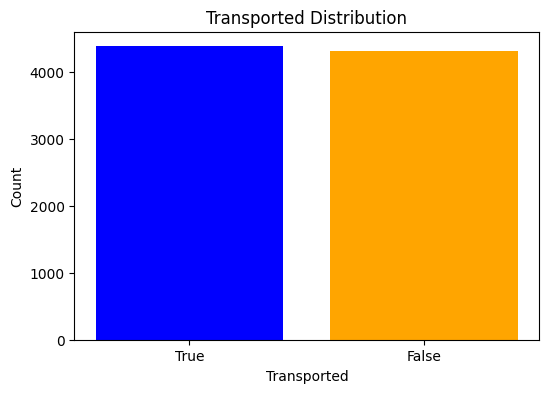

In [14]:
import matplotlib.pyplot as plt

transported_counts = train_data["Transported"].value_counts()

print(transported_counts)

plt.figure(figsize=(6, 4))
plt.bar(transported_counts.index.astype(str), transported_counts.values, color=['blue', 'orange'])
plt.xlabel("Transported")
plt.ylabel("Count")
plt.title("Transported Distribution")
plt.show()
